# Données "Houses"

Votre objectif est de prédire le prix d'une maison à partir de ses caractéristiques (surface, présence d'un garage, présence d'un jardin...).

---

**Q1** Chargez `houses.csv` en tant que pandas dataframe. Affichez les 5 premières lignes.

 ---
 
 **Q2** Faites une première analyse de votre jeu de données (shape, describe, dtypes...)

# 1. Premier modèle linéaire univarié

## 1.1 Définition de la cible et de la feature

 L'objectif est de modéliser le prix de vente des maisons \$ (`SalePrice`) à partir de la surface habitable de ces maisons en $ft^2$ (`GrLivArea`).

---

**Q1** Assignez les deux variables X et y, tels que X soit la feature et y la cible.

---
**Q2** Dans un scatter plot ([doc](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html)) , représentez la relation entre ce prix de vente et cette surface habitable.

## 1.2 Entrainement du modèle

---
**Q3** Entrainez votre modèle. Enregistrez ce modèle entrainé dans une variable `model`.

---
**Q4** Votre modèle est-il performant ?

---
**Q5** Quelle est la pente de votre modèle ? Enregistrez cette pente dans une variable `slope`.

---
**Q6** Quelle est l'ordonnée à l'origine de votre modèle ? Enregistrez cette ordonnée dans une variable `intercept`. 

## 1.3 Visualisation de notre premier modèle 

**Q7** Avec matplotlib, représentez vos données d'origine et la droite du modèle linéaire que vous avez mis en place 

## 1.4 Prédictions grâce à notre modèle

**Q8** Utilisez votre modèle entrainé pour prédire le prix d'une maison dont la surface habitable est de 1200 $ft^2$.

# 2. Deuxième modèle : ajout de features

Nous disposons de nombreuses features, essayons d'en ajouter quelques unes à notre modèle afin d'améliorer ses performances.

**Q1** Créez un modèle pour prédire le prix de vente d'une maison avec:

- Surface habitable (`GrLivArea`)
- Nombre de chambres (`BedroomAbvGr`)
- La qualité globale (`OverallQual`)


Dans un premier temps discutez des différents coefficients. Dans un second temps discutez du score obtenu par rapport au modèle précédent.

**Q2** Utilisez votre modèle entrainé pour prédire le prix d'une maison dont les caractéristiques sont les suivantes :

- Surface habitable de 2000 $ft^2$ (`GrLivArea`)
- 3 chambres (`BedroomAbvGr`)
- Une qualité globale de 6 (`OverallQual`)

# 3. Et si on faisait un peu de preprocessing ? (Optionnel)

Le preprocessing rassemble toutes les modifications pouvant être apportées sur notre jeu de données initial avant toutes constructions de modèles.

In [47]:
df = pd.read_csv("data/houses.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 3.1 Les duplicats

Les lignes dupliquées d'un dataset peuvent entrainer des erreurs (data leakage). Il est important de les repérer et de les supprimer.

---
**Q1** En utilisant la fonction `drop_duplicates()`, identifiez le nombre de lignes dupliquées.

---
**Q2** Supprimez les duplicats du dataset.

## 3.2 Les données manquantes

---
**Q3** Faites afficher le pourcentage de valeurs manquantes pour chaque colonne du dataframe. Aidez vous de la fonction `DataFrame.isnull()` mais pas que!

---
**Q4** Stocker le noms des colonnes qui ont plus de 50% de valeurs manquantes dans une variable `del_column`. Puis supprimez les colonnes associées.


### `RoofSurface`

---
**Q5** Etudiez les valeurs manquantes dans `RoofSurface`. Ensuite, choisissez une des solutions suivantes : 

1. Supprimer la colonne entièrement
2. Remplacer les valeurs manquantes par une valeur de votre choix.

Appliquez les modifications choisies.

⚠️ Attention : toutes les valeurs manquantes ne sont pas représentées par des `np.nans`, et `isnull()` ne détecte que les `np.nans` ⚠️

### `ChimneyStyle`

---
**Q6** Etudiez les valeurs manquantes dans `ChimneyStyle`. Ensuite, choisissez une des solutions suivantes : 

1. Supprimer la colonne entièrement
2. Remplacer les valeurs manquantes par une valeur de votre choix

Appliquez les modifications choisies.

## 3.3 Le scaling

##  Exemple : `RoofSurface` 

<AxesSubplot:xlabel='RoofSurface', ylabel='Count'>

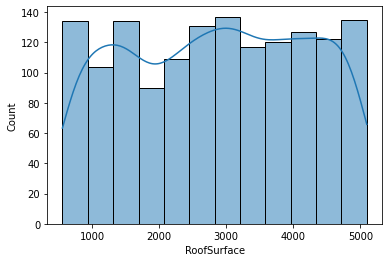

In [57]:
sns.histplot(df['RoofSurface'],kde=True)

---
**Q7** Commentez la distribution précédente. Entre les trois méthodes de scaling proposées, quelle semble être la plus adéquat dans cette situation ? Appliquez la.

- [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- [`RobustScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

## `GrLivArea`

---
**Q8** Comme précédemment, étudiez la distribution de `GrLivArea`. Ensuite, choisissez la méthode de scaling la plus adaptée.

Remplacez la colonne d'origine par sa tranformation comme précédemment.

## 3.4 Test d'un nouveau modèle

---
**Q9** Construisez un nouveau modèle multivarié comme précédemment, en utilisant des features modifiées. Discutez des résultats obtenus.